In [1]:
# These are the standard imports for CS 111.
# This list may change as the quarter goes on.
import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import cs111
%matplotlib inline
np.set_printoptions(precision = 4)

In [2]:
rangePosition = [0, 0.25, 0.5, 0.75, 1]
height = [0, 0.008, 0.015, 0.019, 0.02]

A = np.zeros(shape = (len(rangePosition), 3))
for i in range(len(rangePosition)):
    A[i][0] = rangePosition[i]**2
    A[i][1] = rangePosition[i]
    A[i][2] = 1.0
    
b = np.array(height)
    
print("A: ")
print(A)
print()
print("b: ")
print(b)

A: 
[[0.     0.     1.    ]
 [0.0625 0.25   1.    ]
 [0.25   0.5    1.    ]
 [0.5625 0.75   1.    ]
 [1.     1.     1.    ]]

b: 
[0.    0.008 0.015 0.019 0.02 ]


In [3]:
Q, R = scipy.linalg.qr(A, mode="economic")
print("Q: ")
print(Q)
print()
print("R: ")
print(R)
print()

x = cs111.Usolve(R, Q.T @ b)
print("x: in the form x = [c, b, a]")
print("x =", x)
print()

print("The relative residual of the original linear system Ax = b, ")
print("Since x is an approximation from QR, this should not be zero: ")
print("relres = ", npla.norm( b - A @ x ) / npla.norm( b ))

Q: 
[[ 0.0000e+00 -7.7716e-16  9.4112e-01]
 [-5.3149e-02 -5.4217e-01  2.7323e-01]
 [-2.1260e-01 -6.5744e-01 -9.1077e-02]
 [-4.7834e-01 -3.4579e-01 -1.5179e-01]
 [-8.5039e-01  3.9275e-01  9.1077e-02]]

R: 
[[-1.1759 -1.3287 -1.5945]
 [ 0.     -0.3309 -1.1526]
 [ 0.      0.      1.0626]]

x: in the form x = [c, b, a]
x = [-0.0194  0.0398 -0.0002]

The relative residual of the original linear system Ax = b, 
Since x is an approximation from QR, this should not be zero: 
relres =  0.020865621238291995


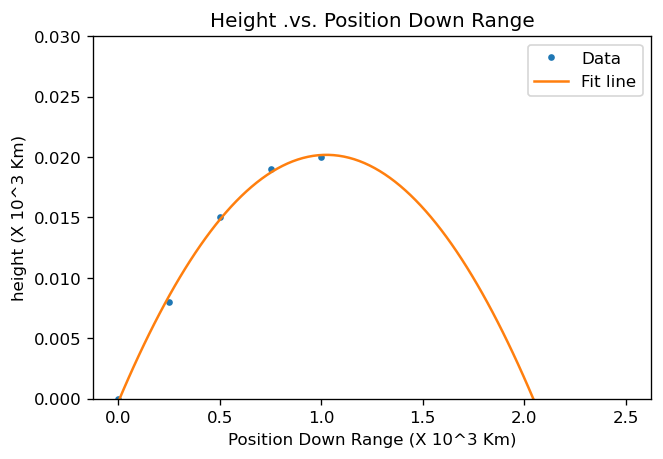

In [4]:
 %matplotlib inline
plt.figure( dpi=120 )
plt.plot( rangePosition, height, ".", label="Data" )
lineD = np.linspace( 0, 2.5, num=100 )
lineF = x[2] + x[1] * lineD + x[0] * lineD**2
plt.plot( lineD, lineF, label="Fit line" )
plt.xlabel( r"Position Down Range (X 10^3 Km)" )
plt.ylabel( r"height (X 10^3 Km)" )
plt.ylim( [0, 0.03])
plt.title( r"Height .vs. Position Down Range" )
plt.legend()

In [5]:
a = x[2]
b = x[1]
c = x[0]
d = (b**2) - (4*c*a)

sol1 = (-b-np.sqrt(d))/(2*c)
sol2 = (-b+np.sqrt(d))/(2*c)

if (sol1 > sol2):
    landing = sol1
else:
    landing = sol2

print("Predicted Landing Position: ")
print(landing)

Predicted Landing Position: 
2.0442449627629498


In [6]:
# print("The relative norm for the QR factorization: ")
# print(npla.norm( Q @ R - A )/npla.norm( A ))
# print()
# print("The relative residual with the approximated system (should be zero): ")
# print(npla.norm( Q.T @ b - R @ x ) / npla.norm( Q.T @ b ))
# print()